# Assignment 3 - Building a Custom Visualization

---

In this assignment you must choose one of the options presented below and submit a visual as well as your source code for peer grading. The details of how you solve the assignment are up to you, although your assignment must use matplotlib so that your peers can evaluate your work. The options differ in challenge level, but there are no grades associated with the challenge level you chose. However, your peers will be asked to ensure you at least met a minimum quality for a given technique in order to pass. Implement the technique fully (or exceed it!) and you should be able to earn full grades for the assignment.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM. ([video](https://www.youtube.com/watch?v=BI7GAs-va-Q))


In this [paper](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) the authors describe the challenges users face when trying to make judgements about probabilistic data generated through samples. As an example, they look at a bar chart of four years of data (replicated below in Figure 1). Each year has a y-axis value, which is derived from a sample of a larger dataset. For instance, the first value might be the number votes in a given district or riding for 1992, with the average being around 33,000. On top of this is plotted the 95% confidence interval for the mean (see the boxplot lectures for more information, and the yerr parameter of barcharts).

<br>
<img src="readonly/Assignment3Fig1.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Figure 1 from (Ferreira et al, 2014).</h4>

<br>

A challenge that users face is that, for a given y-axis value (e.g. 42,000), it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal). One of the solutions the authors propose for this problem (Figure 2c) is to allow users to indicate the y-axis value of interest (e.g. 42,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value.


<br>
<img src="readonly/Assignment3Fig2c.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  Figure 2c from (Ferreira et al. 2014). Note that the colorbar legend at the bottom as well as the arrows are not required in the assignment descriptions below.</h4>

<br>
<br>

**Easiest option:** Implement the bar coloring as described above - a color scale with only three colors, (e.g. blue, white, and red). Assume the user provides the y axis value of interest as a parameter or variable.


**Harder option:** Implement the bar coloring as described in the paper, where the color of the bar is actually based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis).

**Even Harder option:** Add interactivity to the above, which allows the user to click on the y axis to set the value of interest. The bar colors should change with respect to what value the user has selected.

**Hardest option:** Allow the user to interactively set a range of y values they are interested in, and recolor based on this (e.g. a y-axis band, see the paper for more details).

---

*Note: The data given for this assignment is not the same as the data used in the article and as a result the visualizations may look a little different.*


Note from my side,


This is precisely how you construct the confidence interval for the population mean. What we are doing with the CI is to make a statement that 95 times out of 100 our sample mean would fall within this interval should we retest the sample from the population. We never know the population mean, but we know as the sample size increases, and if our sample is unbiased, then it converges in probability to the mean by the weak law of large numbers. So we are 95% confident that the population mean falls within this interval, such is the inference we are making from the sample we collected.

The standard deviation of the sample is used to construct the estimator of the standard deviation of the mean, which is called the standard error. And the interval is constructed from the equation: mean +- std.err of mean * z (or t) stat of the desired confidence. Since we are in large sample sizes, z=t by asymptotic theory and so we use 1.96: mean +- std.err of mean*1.96

Since we already plotted the mean on the bar chart all that is left is to give to yerr the value std.err of mean*1.96. We can do this with sem, which is the same as passing to yerr = (df.std().values/(len(df))**(1/2))*1.96


The t distribution is similar in shape to the normal distribution, but has heavier tails. The heavier tails stem from uncertainty in using s as an estimate of in a normal distribution problem. Uncertainty about declines rapidly as n increases, and so, as the “degrees of freedom” ( n - 1) increase, the t distribution becomes increasingly like the normal distribution. Indeed, when n > 120, one can simply use the z table, because t and z values coincide at least two decimal places.

Now as we have to look at the Z table and not the T table, the Z value for a confidence level of 95% is 1.96.

The value of 1.96 is based on the fact that 95% of the area of a normal distribution is within 1.96 standard deviations of the mean

This is a value which is looked up in a table known as Z table.

For all who did not understand the the difference between the T distribution and the Z distribution. Where Z distribution is the normal distribution

Very informative video : https://www.youtube.com/watch?v=sJyZ9vRhP7o

<IPython.core.display.Javascript object>


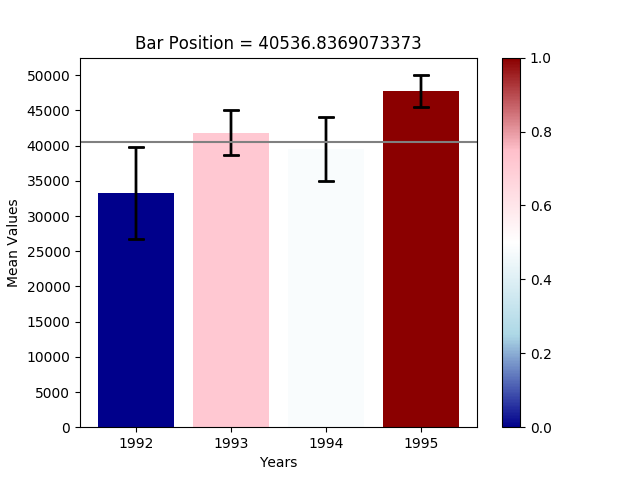

In [14]:
%matplotlib notebook

import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import matplotlib.cm as cm
from scipy.stats import sem

#Data
np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

#Creating figure
fig = plt.figure()


#Mean of all 4 rows
mean = df.mean(axis=1)
df['mean'] = df.mean(axis=1)
mean_range = range(0,50000+1)

#Explanation of error formala given above in notes.
yerr = df.T.sem()*1.96 

#Default bar plot
plt.bar(range(df.shape[0]), mean, yerr = yerr,color='grey',capsize=6)
plt.xlabel('Years')
plt.ylabel('Mean Values')

class PointPicker(object):
    def __init__(self, ax, clicklim=0.05):
        self.fig=ax.figure
        self.ax = ax
        self.clicklim = clicklim
        self.horizontal_line = ax.axhline(color='grey')
    
        self.fig.canvas.mpl_connect('button_press_event', self.onclick)


    def onclick(self, event):
        if event.inaxes == self.ax:
            x = event.xdata
            y = event.ydata
            barValue = y
            
            xlim0, xlim1 = ax.get_xlim()
            
            if x <= xlim0+(xlim1-xlim0)*self.clicklim: #Checking the distance for Y axis(For better understanding of value comment xticks onece ant then see the values)
                self.horizontal_line.set_ydata(y)   #Setting Y location in horizontal line in such way that it removes previous set y data
                
                #Ploting the bargraph. df.shape gives a tuple of (no. of column,no. of row) and df.shape[0] gives us no.columns
                plt.bar(range(df.shape[0]), mean, yerr = yerr, capsize=6,color=cpick.to_rgba((mean +df['mean'].T.sem()*1.96-barValue)/10000))
                plt.title('Bar Position = {}'.format(barValue))
                x = np.array([0,1,2,3])
                
                #masking values based upon conditions.
                mask1 = barValue < mean - df.T.sem()*1.96
                mask2 = barValue > mean + df.T.sem()*1.96
                mask3 = barValue == mean

                plt.bar(x[mask1], mean[mask1], color = 'darkred', capsize=6)
                plt.bar(x[mask2], mean[mask2], color = 'darkblue',capsize=6)
                plt.bar(x[mask3], mean[mask3], color='white', capsize=6)

               
                self.fig.canvas.draw()



# Make a user-defined colormap using LinerSegmentedColormap
cm1 = mcol.LinearSegmentedColormap.from_list("MyCmapName",["darkblue","lightblue","w","pink","darkred"])


# Make a normalizer that will map the difference of mean values from
# [start ,end+1] -> [0,1].

cnorm = mcol.Normalize(vmin=0.00,vmax=1.00)  #Min and Max limit of color map

# Turn these into an object that can be used to map mean values to colors and
# can be passed to plt.colorbar().
cpick = cm.ScalarMappable(norm=cnorm,cmap=cm1)
cpick.set_array([])


#Setting the XTicks and YTicks
plt.xticks(range(4),['1992','1993','1994','1995'])

start, end = plt.gca().get_ylim()
plt.gca().yaxis.set_ticks(np.arange(start, end, 5000))

#Setting colorbar
plt.colorbar(cpick)

#Calling PointPicker class
p = PointPicker(plt.gca())
plt.show()

